# Compare CO HITRAN and HITEMP

For the 4.4 µm band, at various temperatures. 

For any help, refer to [RADIS documentation](https://radis.readthedocs.io) 

---

First let's initialize our RADIS environment, and the calculation conditions : 

In [ ]:
# Setup plots : use `%matplotlib widget` for interactive plots (zoom, etc.) but graphs will not appear on download.
%matplotlib inline

from radis import calc_spectrum, Spectrum, plot_diff
from astropy import units as u

conditions = {"wavenum_min": 1300 / u.cm, 
              "wavenum_max": 2900 / u.cm,
              "molecule":'CO',
              "isotope":'1,2,3',
              "pressure":1.01325 * u.bar,
              "mole_fraction":1,
              "path_length":1 * u.cm,
             }


Now let's calculate the spectra with [calc_spectrum](https://radis.readthedocs.io/en/latest/source/radis.lbl.calc.html#radis.lbl.calc.calc_spectrum) 

In [2]:
# CO HITRAN
s_tran = calc_spectrum(**conditions,
                       Tgas=700, 
                       databank='fetch',  # HITRAN automatically downloaded
                       name="HITRAN"
                      )

Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO_1_1295.00_2905.01.h5
Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO_2_1295.00_2905.01.h5
Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO_3_1295.00_2905.01.h5
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 700 K
   Trot                 700 K
   Tvib                 700 K
   isotope              1,2,3
   mole_fraction        1
   molecule             CO
   path_length          1.0 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          2900.0000 cm-1
   wavenum_min          1300.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cutoff         

/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:241: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


Spectrum calculated in 3.95s


In [3]:
# CO HITEMP
s_temp = calc_spectrum(**conditions,
                       Tgas=700, 
                       databank='HITEMP2019-CO',  # HITRAN automatically downloaded
                       name="HITEMP2019"
                      )

Using database: HITEMP2019-CO
HITEMP2019-CO 
-------
info : HITEMP2019 CO lines with TIPS for partition functions and RADIS for nonequilibrium
path : ['databases/HITEMP/05_HITEMP2019_all.par']
format : hitran
parfuncfmt : hapi
levelsfmt : radis


Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 700 K
   Trot                 700 K
   Tvib                 700 K
   isotope              1,2,3
   mole_fraction        1
   molecule             CO
   path_length          1.0 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          2900.0000 cm-1
   wavenum_min          1300.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cutoff               1e-27 cm-1/(#.cm-2)
   db_assumed_sort

/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:241: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


Spectrum calculated in 4.17s


Plot the difference with [plot_diff](https://radis.readthedocs.io/en/latest/source/radis.spectrum.compare.html#radis.spectrum.compare.plot_diff)

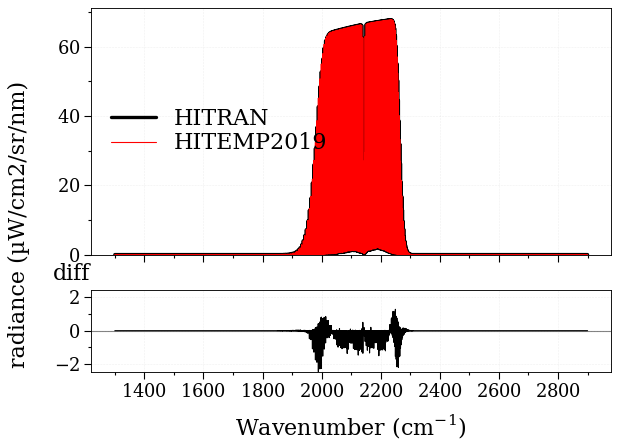

(<Figure size 640x480 with 2 Axes>,
 [<AxesSubplot:>, <AxesSubplot:xlabel='Wavenumber (cm$^\\mathregular{-1}$)'>])

In [4]:
plot_diff(s_tran, s_temp, Iunit='µW/cm2/sr/nm')

### Comparison for various temperatures 

Let's make a loop : 

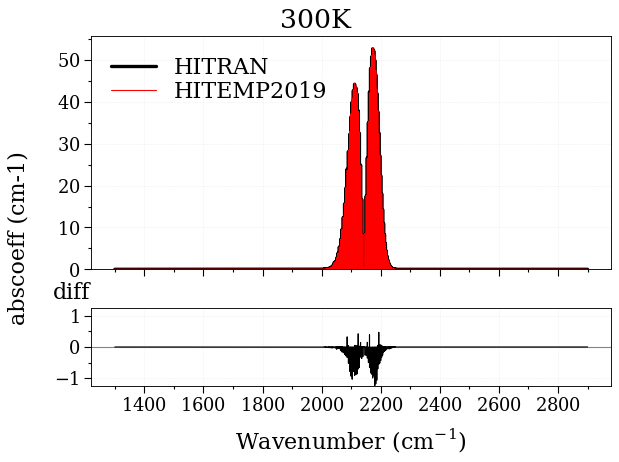

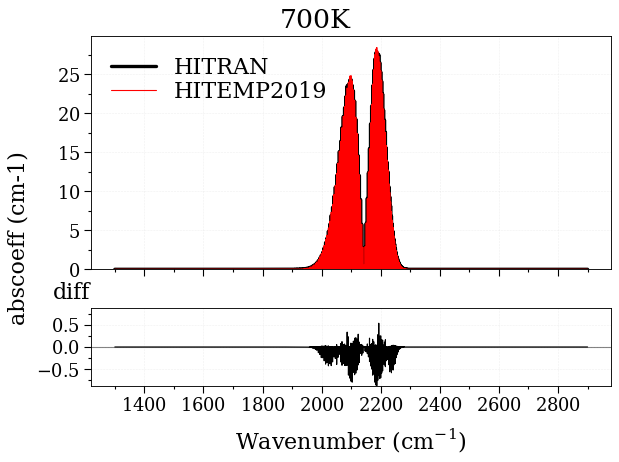

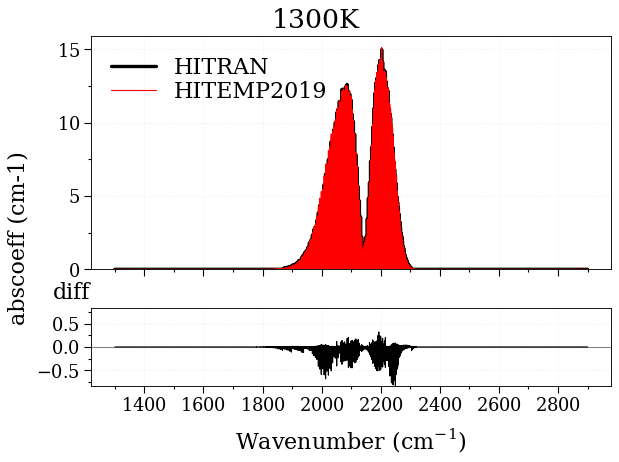

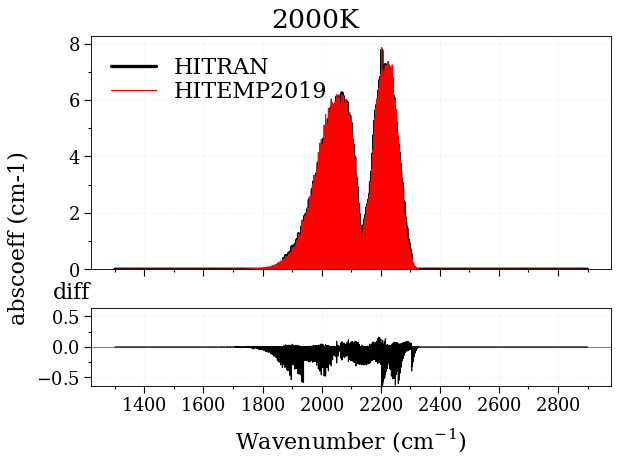

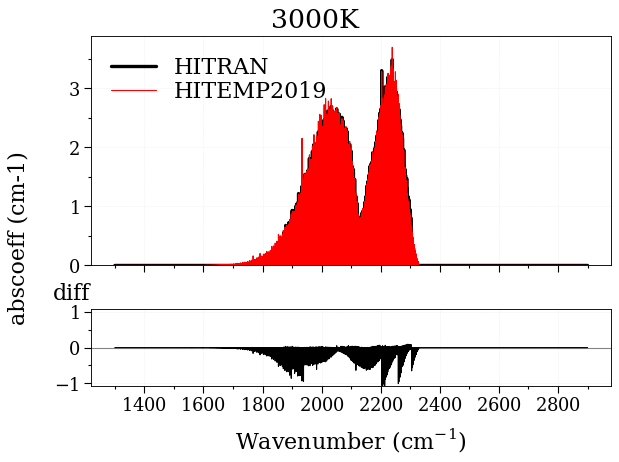

Exception: TIPS: T must be between 70K and 3000K.

In [5]:
conditions.update({
    "warnings":{
            "MissingSelfBroadeningWarning": "ignore", # HITRAN has no temperature dependance for resonant-broadening
            "HighTemperatureWarning": "ignore", # HITRAN at high temperature is not valid and will trigger warnings. 
        },
    "verbose": False,  # no need to print calculation details 
})
    

for Tgas in [300, 700, 1300, 2000, 3000, 4000]:
    s_tran = calc_spectrum(**conditions,
                           Tgas=Tgas, 
                           databank='fetch',  # HITRAN automatically downloaded
                           name="HITRAN")
    s_temp = calc_spectrum(**conditions,
                           Tgas=Tgas, 
                           databank="HITEMP2019-CO",
                           name="HITEMP2019")
    plot_diff(s_tran, s_temp, 'abscoeff', title=f"{Tgas}K")